<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BI-RADS assessment  961 non-null    object
 1   Age                 961 non-null    object
 2   Shape               961 non-null    object
 3   Margin              961 non-null    object
 4   Density             961 non-null    object
 5   Severity            961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  959 non-null    float64
 1   Age                 956 non-null    float64
 2   Shape               930 non-null    float64
 3   Margin              913 non-null    float64
 4   Density             885 non-null    float64
 5   Severity 

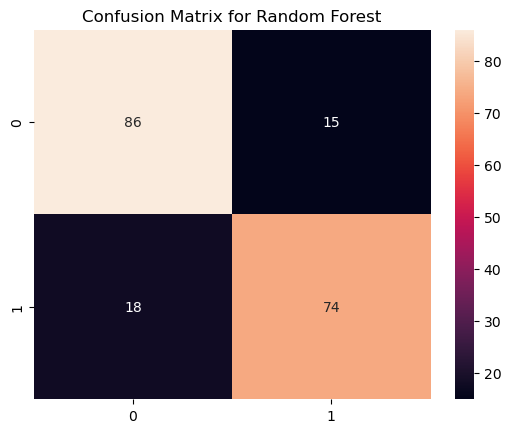

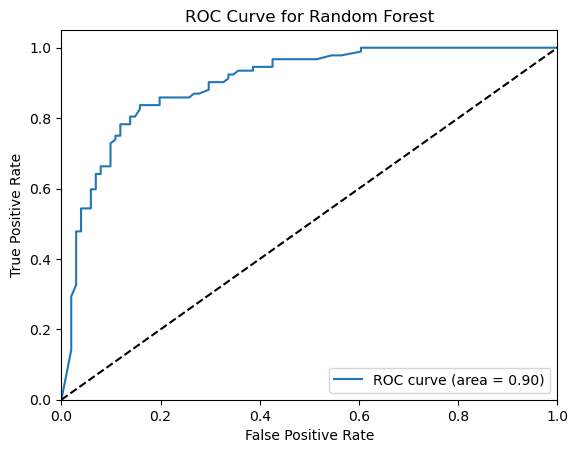

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       101
         1.0       0.83      0.80      0.82        92

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



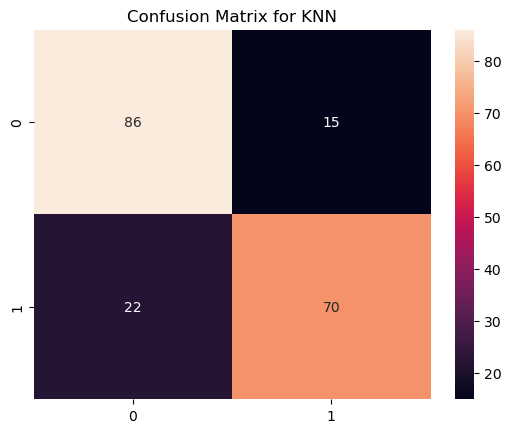

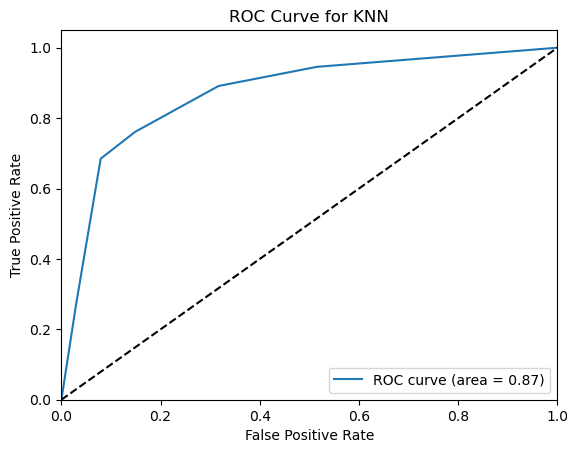

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       101
         1.0       0.82      0.76      0.79        92

    accuracy                           0.81       193
   macro avg       0.81      0.81      0.81       193
weighted avg       0.81      0.81      0.81       193



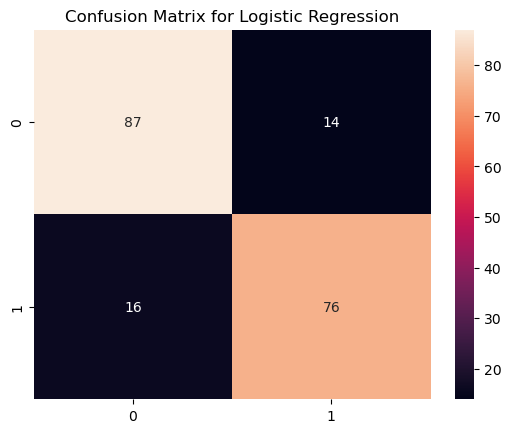

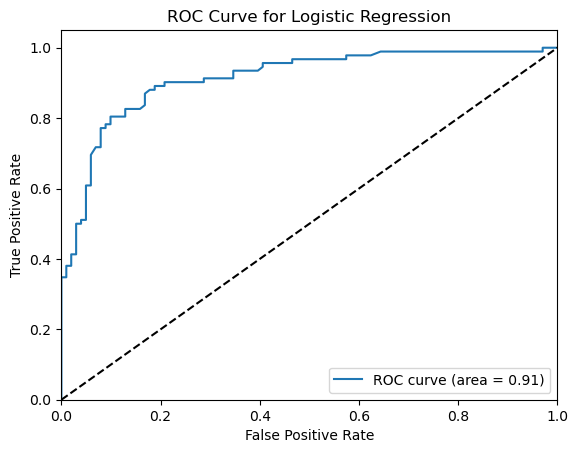

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       101
         1.0       0.84      0.83      0.84        92

    accuracy                           0.84       193
   macro avg       0.84      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Load and preprocess the dataset
data = pd.read_csv('mammographic_masses.csv')
data.head()
data.tail()
data.info()
data.describe()
data.replace('?', np.nan, inplace=True)
data = data.astype(float)

# Impute missing values and separate features from the target
X = data.drop('Severity', axis=1)
y = data['Severity']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

data.head()
data.tail()
data.info()
data.describe()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classification
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Trainning the model and evaluate them
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:,1]
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Classification report
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")


Random Forest training accuracy: 0.9492
Random Forest testing accuracy: 0.8290

KNN training accuracy: 0.8464
KNN testing accuracy: 0.8083

Logistic Regression training accuracy: 0.8281
Logistic Regression testing accuracy: 0.8446



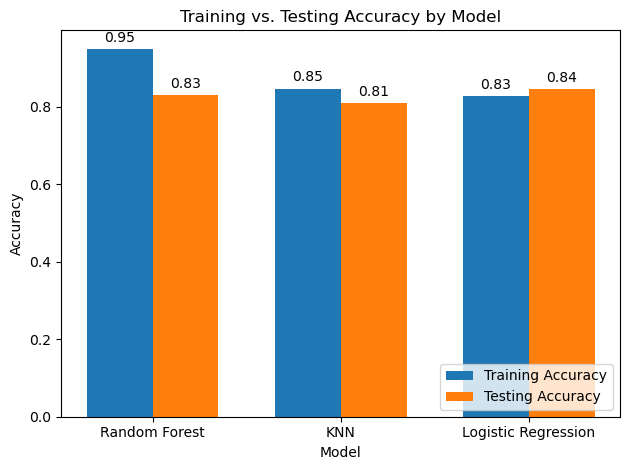

In [7]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# store accuracy scores for training and testing datasets
training_accuracies = []
testing_accuracies = []
model_names = []

# Evaluate each model on both training and testing datasets
for name, clf in classifiers.items():
    # Store model name
    model_names.append(name)
    
    # Calculate training accuracy 
    train_accuracy = clf.score(X_train_scaled, y_train)
    training_accuracies.append(train_accuracy)
    
    # Calculate testing accuracy
    test_accuracy = clf.score(X_test_scaled, y_test)
    testing_accuracies.append(test_accuracy)
    
    # Print accuracies for reference
    print(f"{name} training accuracy: {train_accuracy:.4f}")
    print(f"{name} testing accuracy: {test_accuracy:.4f}\n")

# bar plot
bar_width = 0.35  # width of the bars
index = np.arange(len(model_names))  # label locations

fig, ax = plt.subplots()
train_bars = ax.bar(index - bar_width/2, training_accuracies, bar_width, label='Training Accuracy')
test_bars = ax.bar(index + bar_width/2, testing_accuracies, bar_width, label='Testing Accuracy')

# Adding label and title to plot
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training vs. Testing Accuracy by Model')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend(loc='lower right')

# Function to add labels on top of the bars
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(train_bars)
autolabel(test_bars)

fig.tight_layout()

plt.show()
